<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment - Food Classification Model (Individual)</h2><h3>AY2025/26 Semester</h3></th>
    </tr>
</table>

## Student Name: Lim Ai Sim Elizabeth (ID: 3440680F)</h3>

# **NOTEBOOK 1**

## **Introduction**

This notebook contains the initial codes for data import and transformation, model setup, training and validation. The model is put together is based on convolutional neural network (CNN) architecture.

Note that the observations and changes are not always recorded in this notebook, rather an excel sheet was used to compare graphs and note down observations.

(Gemini in Google Colab was also use to help generate and debug some of the codes used in this notebook.)

### Import Libraries and environmental setup

In [ ]:
# Import the Required Packages

from tensorflow import keras
print('keras: ', keras.__version__)
# Keras version must be at least 2.6.0


keras:  3.8.0


In [ ]:
# FOR COLAB: Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


## **1) Data import, transformation and exploration**

In [ ]:
# FOR COLAB: Data loading from drive

import os
import zipfile


# Define the path to your zip file and the target directory for extraction
zip_file_path = '/content/drive/My Drive/Colab Notebooks/DLIR/Food.zip'
extract_dir = '/content/drive/My Drive/Colab Notebooks/DLIR/'


#Extract the zip file (commented out once extracted)
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# Define paths to the train, validation, and test directories
train_dir = os.path.join(extract_dir, 'Food', 'train')
validation_dir = os.path.join(extract_dir, 'Food','validation')
test_dir = os.path.join(extract_dir, 'Food','test')

# check path
print(train_dir)
print(validation_dir)
print(test_dir)

/content/drive/My Drive/Colab Notebooks/DLIR/Food/train
/content/drive/My Drive/Colab Notebooks/DLIR/Food/validation
/content/drive/My Drive/Colab Notebooks/DLIR/Food/test


In [ ]:
# FOR AWS: Data loading

# # Define paths to the train, validation, and test directories
# train_dir = 'Food/train'
# validation_dir = 'Food/validation'
# test_dir = 'Food/test'

# # check path
# print(train_dir)
# print(validation_dir)
# print(test_dir)

### Check the images provided for training

In [ ]:
# view images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to display first N images from each subdirectory within a given path
def display_first_n_images(base_dir, n=3):
    print(f"Checking first {n} images in subfolders of: {base_dir}")
    for subdir in os.listdir(base_dir):
        subdir_path = os.path.join(base_dir, subdir)
        if os.path.isdir(subdir_path):
            print(f"  Subfolder: {subdir}")
            images = [f for f in os.listdir(subdir_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
            images = sorted(images) # Optional: sort to get consistent results
            num_images_to_display = min(n, len(images))

            if num_images_to_display > 0:
                plt.figure(figsize=(10, 3))
                for i in range(num_images_to_display):
                    img_path = os.path.join(subdir_path, images[i])
                    try:
                        img = mpimg.imread(img_path)
                        plt.subplot(1, num_images_to_display, i + 1)
                        plt.imshow(img)
                        plt.title(f"{subdir}/{images[i]}")
                        plt.axis('off')
                    except Exception as e:
                        print(f"    Could not load image {images[i]}: {e}")
                plt.tight_layout()
                plt.show()
            else:
                print("    No images found in this subfolder.")

# Check images in training directory
display_first_n_images(train_dir)

# Check images in validation directory
display_first_n_images(validation_dir)

# Check images in test directory
display_first_n_images(test_dir)

Output hidden; open in https://colab.research.google.com to view.

### Count the number of images in each folder

In [ ]:
# prompt: /content/drive/My Drive/Colab Notebooks/DLIR/Food/train
# /content/drive/My Drive/Colab Notebooks/DLIR/Food/validation
# /content/drive/My Drive/Colab Notebooks/DLIR/Food/test
# I have subfolders in each of the folders above.
# I want to look through each of those subfolders, check the the number of image files in each of the subfolders.

# Function to count images in subfolders
def count_images_in_subfolders(base_dir):
  print(f"Counting images in subfolders of: {base_dir}")
  total_images = 0
  for subdir in os.listdir(base_dir):
    subdir_path = os.path.join(base_dir, subdir)
    if os.path.isdir(subdir_path):
      images = [f for f in os.listdir(subdir_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
      num_images = len(images)
      print(f"  Subfolder: {subdir} - {num_images} images")
      total_images += num_images
  print(f"Total images in {base_dir}: {total_images}")
  print("-" * 20)


# Count images in training directory
count_images_in_subfolders(train_dir)

# Count images in validation directory
count_images_in_subfolders(validation_dir)

# Count images in test directory
count_images_in_subfolders(test_dir)

Counting images in subfolders of: /content/drive/My Drive/Colab Notebooks/DLIR/Food/train
  Subfolder: beet_salad - 750 images
  Subfolder: beignets - 750 images
  Subfolder: eggs_benedict - 750 images
  Subfolder: hamburger - 750 images
  Subfolder: hot_and_sour_soup - 750 images
  Subfolder: huevos_rancheros - 750 images
  Subfolder: lasagna - 750 images
  Subfolder: risotto - 750 images
  Subfolder: seaweed_salad - 750 images
  Subfolder: strawberry_shortcake - 750 images
Total images in /content/drive/My Drive/Colab Notebooks/DLIR/Food/train: 7500
--------------------
Counting images in subfolders of: /content/drive/My Drive/Colab Notebooks/DLIR/Food/validation
  Subfolder: beet_salad - 200 images
  Subfolder: beignets - 200 images
  Subfolder: eggs_benedict - 200 images
  Subfolder: hamburger - 200 images
  Subfolder: hot_and_sour_soup - 200 images
  Subfolder: huevos_rancheros - 200 images
  Subfolder: lasagna - 200 images
  Subfolder: risotto - 200 images
  Subfolder: seaweed_sa

### Data transformation for training, validation and testing

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# We will resize all the images as 150*150 pixels
# because image files are of different sizes, need them to be uniform for input.


img_size = 150

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [ ]:
# checking the shape of the data

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (25, 150, 150, 3)
labels batch shape: (25, 10)


## **2) Continue to develop the Image Classification Model**

### Model 1

In [ ]:
# required libraries

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Build the Model

model = models.Sequential()
model.add(keras.Input(shape=(img_size, img_size, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


# Compile the model

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     6,423,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,194,314 (27.44 MB)

 Trainable params: 7,194,314 (27.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Model

history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 7612s 25s/step - acc: 0.1909 - loss: 2.1462 - val_acc: 0.3405 - val_loss: 1.8436
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 44s 148ms/step - acc: 0.3598 - loss: 1.7950 - val_acc: 0.4115 - val_loss: 1.6569
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 44s 145ms/step - acc: 0.4465 - loss: 1.5933 - val_acc: 0.4040 - val_loss: 1.6880
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 44s 148ms/step - acc: 0.4826 - loss: 1.5037 - val_acc: 0.5125 - val_loss: 1.4485
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 43s 143ms/step - acc: 0.5343 - loss: 1.3518 - val_acc: 0.5170 - val_loss: 1.4145
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 45s 150ms/step - acc: 0.5836 - loss: 1.2256 - val_acc: 0.5640 - val_loss: 1.3092
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 44s 146ms/step - acc: 0.6062 - loss: 1.1467 - val_acc: 0.5500 - val_loss: 1.3378
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 44s 147ms/step - acc: 0.6545 - loss: 1.0262 - val_acc: 0.5765 - val_loss: 1.2516
Epoch 9/30
300/300 ━━━━━━━━━━━━━

In [ ]:
# Save the Model
model.save('/content/drive/My Drive/Colab Notebooks/DLIR/foodinitial.keras')

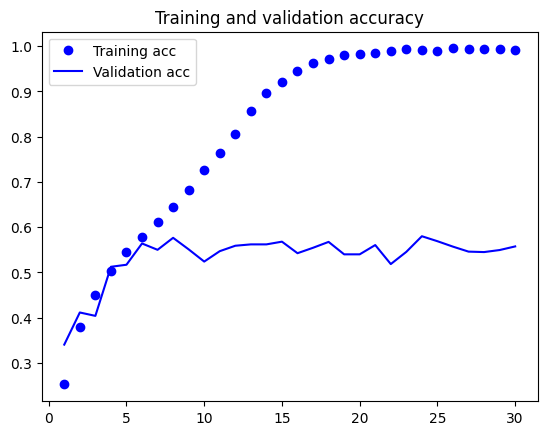

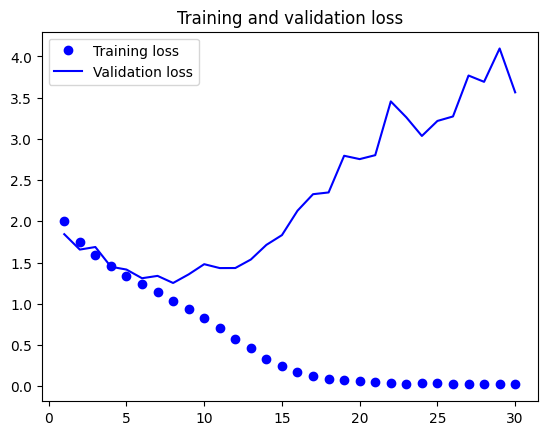

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 - 367s - 18s/step - acc: 0.5420 - loss: 3.7765


## Model 1-2

- Adding a dropout layer



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Redo the image to change the batch number to 50

img_size = 150

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [ ]:
# Build the Model


model = models.Sequential()
model.add(keras.Input(shape=(img_size, img_size, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.summary()


# Compile the model

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     6,423,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,194,314 (27.44 MB)

 Trainable params: 7,194,314 (27.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Model

history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 3020s 20s/step - acc: 0.1754 - loss: 2.2082 - val_acc: 0.3190 - val_loss: 1.8843
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 44s 296ms/step - acc: 0.3305 - loss: 1.8533 - val_acc: 0.3470 - val_loss: 1.8596
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 278ms/step - acc: 0.3944 - loss: 1.7215 - val_acc: 0.4300 - val_loss: 1.6239
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 280ms/step - acc: 0.4296 - loss: 1.6276 - val_acc: 0.3985 - val_loss: 1.7388
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 43s 284ms/step - acc: 0.4626 - loss: 1.5460 - val_acc: 0.4500 - val_loss: 1.5799
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 43s 289ms/step - acc: 0.4862 - loss: 1.5075 - val_acc: 0.4815 - val_loss: 1.4994
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 283ms/step - acc: 0.4955 - loss: 1.4367 - val_acc: 0.4805 - val_loss: 1.5021
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 278ms/step - acc: 0.5365 - loss: 1.3462 - val_acc: 0.5110 - val_loss: 1.4206
Epoch 9/30
150/150 ━━━━━━━━━━━━━

In [ ]:
# Save the Model
model.save('/content/drive/My Drive/Colab Notebooks/DLIR/food_1_2_dropout.keras')

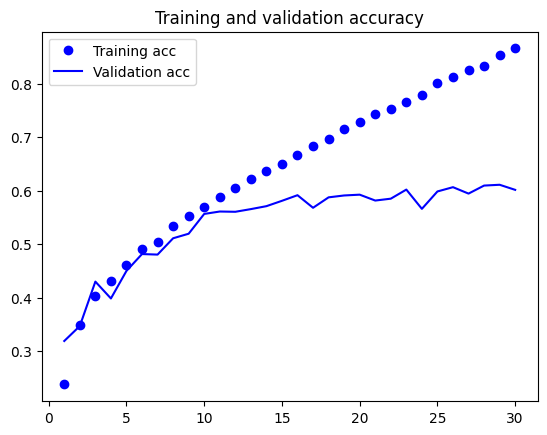

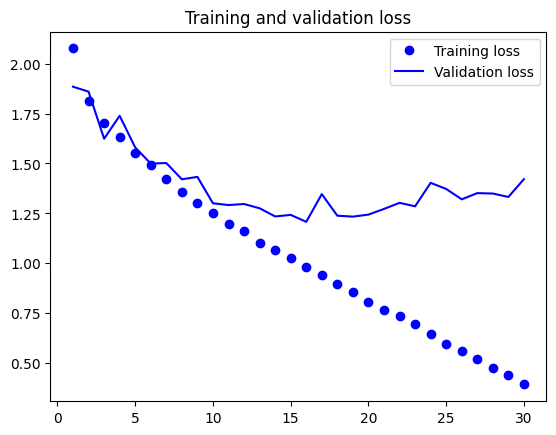

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

10/10 - 160s - 16s/step - acc: 0.5580 - loss: 1.4781


## Model 1-3

- Change the kernal size in first convolutional layer from 3x3 to 5x5

In [ ]:
# Build the Model


model = models.Sequential()
model.add(keras.Input(shape=(img_size, img_size, 3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu')) # changed here
model.add(layers.MaxPooling2D((2, 2))) # changed here
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.summary()


# Compile the model

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 146, 146, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 33, 33, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     6,423,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,195,850 (27.45 MB)

 Trainable params: 7,195,850 (27.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Model

history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 50s 292ms/step - acc: 0.1622 - loss: 2.2301 - val_acc: 0.3190 - val_loss: 1.8842
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 278ms/step - acc: 0.3373 - loss: 1.8309 - val_acc: 0.3765 - val_loss: 1.7429
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 46s 304ms/step - acc: 0.3968 - loss: 1.7240 - val_acc: 0.4205 - val_loss: 1.6804
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 283ms/step - acc: 0.4234 - loss: 1.6415 - val_acc: 0.3955 - val_loss: 1.6959
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 281ms/step - acc: 0.4472 - loss: 1.5776 - val_acc: 0.4420 - val_loss: 1.6046
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 282ms/step - acc: 0.4785 - loss: 1.5175 - val_acc: 0.5085 - val_loss: 1.4750
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 44s 296ms/step - acc: 0.5080 - loss: 1.4378 - val_acc: 0.5215 - val_loss: 1.4209
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 280ms/step - acc: 0.5295 - loss: 1.3817 - val_acc: 0.4750 - val_loss: 1.5450
Epoch 9/30
150/150 ━━━━━━━━━━━━━

In [ ]:
# Save the Model
model.save('/content/drive/My Drive/Colab Notebooks/DLIR/food_1_3_con2D.keras')

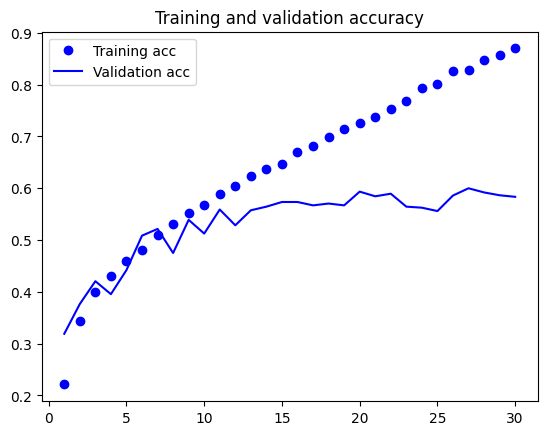

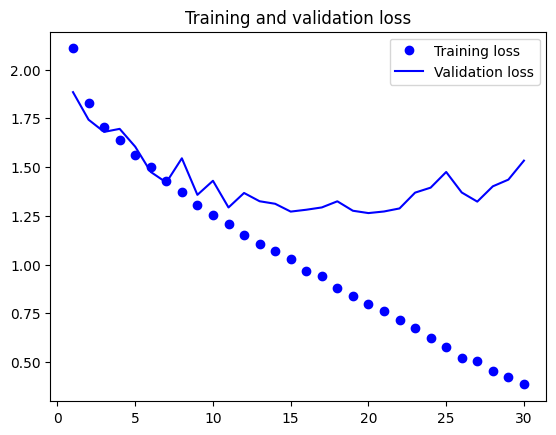

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

10/10 - 2s - 208ms/step - acc: 0.5660 - loss: 1.5433


## Model 1-4

- include Dropout

-  include L2 regularization in the first dense layer because it is best where there are many trainable parameters.





In [ ]:
from tensorflow.keras import regularizers

# Build the Model


model = models.Sequential()
model.add(keras.Input(shape=(img_size, img_size, 3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu')) # changed here
model.add(layers.MaxPooling2D((2, 2))) # changed here
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.summary()


# Compile the model

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 146, 146, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 33, 33, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1024)           │     6,423,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,195,850 (27.45 MB)

 Trainable params: 7,195,850 (27.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Model

history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 46s 286ms/step - acc: 0.1551 - loss: 3.9219 - val_acc: 0.2855 - val_loss: 3.4719
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 79s 280ms/step - acc: 0.3303 - loss: 3.3215 - val_acc: 0.3305 - val_loss: 3.1781
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 44s 293ms/step - acc: 0.3898 - loss: 3.0432 - val_acc: 0.4175 - val_loss: 2.8590
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 45s 300ms/step - acc: 0.4181 - loss: 2.8185 - val_acc: 0.4270 - val_loss: 2.7080
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 45s 298ms/step - acc: 0.4530 - loss: 2.6119 - val_acc: 0.4500 - val_loss: 2.5250
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 282ms/step - acc: 0.4824 - loss: 2.4489 - val_acc: 0.4905 - val_loss: 2.3579
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 277ms/step - acc: 0.5238 - loss: 2.2846 - val_acc: 0.5235 - val_loss: 2.2173
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 281ms/step - acc: 0.5445 - loss: 2.1242 - val_acc: 0.5180 - val_loss: 2.1386
Epoch 9/30
150/150 ━━━━━━━━━━━━━

In [ ]:
# Save the Model
model.save('/content/drive/My Drive/Colab Notebooks/DLIR/food_1_4_con2D_drop_L2.keras')

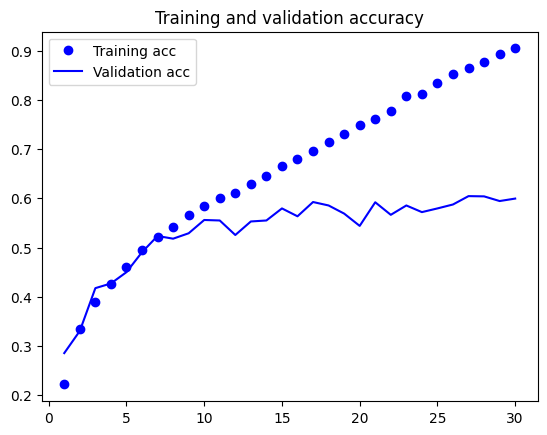

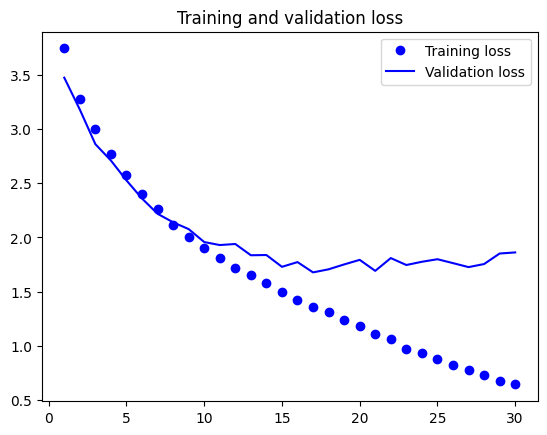

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

10/10 - 2s - 225ms/step - acc: 0.5920 - loss: 1.9486


## Model 1-5

- include dropout
- include L2 regularization
- conv2D : kernal size change back from 5x5 to 3x3. And added one cov2D layer before flatten layer.

In [ ]:
from tensorflow.keras import regularizers

# Build the Model


model = models.Sequential()
model.add(keras.Input(shape=(img_size, img_size, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu')) # added this layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.summary()


# Compile the model

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 5, 5, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,115,530 (8.07 MB)

 Trainable params: 2,115,530 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Model

history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 288ms/step - acc: 0.1263 - loss: 3.2619 - val_acc: 0.2695 - val_loss: 2.8939
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 279ms/step - acc: 0.2778 - loss: 2.8045 - val_acc: 0.3155 - val_loss: 2.6579
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 280ms/step - acc: 0.3285 - loss: 2.6280 - val_acc: 0.3395 - val_loss: 2.5619
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 279ms/step - acc: 0.3523 - loss: 2.5044 - val_acc: 0.3820 - val_loss: 2.3973
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 44s 294ms/step - acc: 0.3725 - loss: 2.3998 - val_acc: 0.3885 - val_loss: 2.3277
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 278ms/step - acc: 0.3910 - loss: 2.3109 - val_acc: 0.4135 - val_loss: 2.2404
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 41s 273ms/step - acc: 0.4044 - loss: 2.2162 - val_acc: 0.4205 - val_loss: 2.1557
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 41s 276ms/step - acc: 0.4405 - loss: 2.1355 - val_acc: 0.4100 - val_loss: 2.1301
Epoch 9/30
150/150 ━━━━━━━━━━━━━

In [ ]:
# Save the Model
model.save('/content/drive/My Drive/Colab Notebooks/DLIR/food_1_5_con2Dadd1_drop_L2.keras')

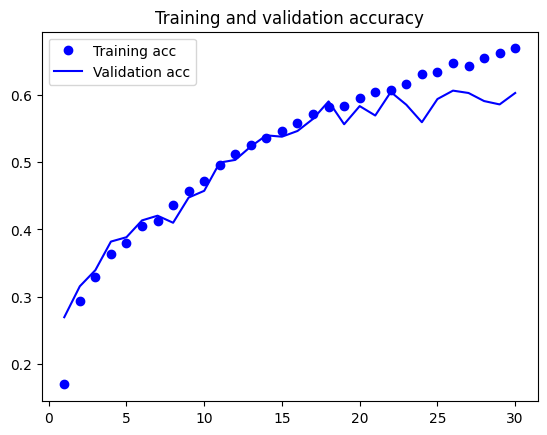

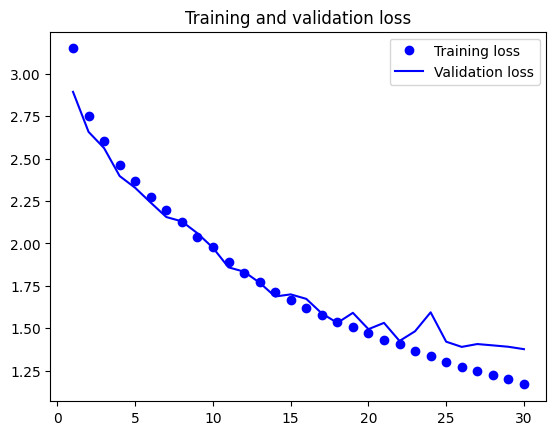

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

10/10 - 3s - 255ms/step - acc: 0.6080 - loss: 1.4494


## Model 1-6

- include dropout
- include L2 regularization
- conv2D : kernal size change back. add one cov2D layer with 32 units at the input.

In [ ]:
from tensorflow.keras import regularizers

# Build the Model


model = models.Sequential()
model.add(keras.Input(shape=(img_size, img_size, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #added an extra 32 layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.summary()


# Compile the model

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 5, 5, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,305,322 (4.98 MB)

 Trainable params: 1,305,322 (4.98 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Model

history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 47s 285ms/step - acc: 0.1191 - loss: 2.9472 - val_acc: 0.2480 - val_loss: 2.6096
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 41s 274ms/step - acc: 0.2656 - loss: 2.5684 - val_acc: 0.2640 - val_loss: 2.5593
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 43s 289ms/step - acc: 0.3067 - loss: 2.4193 - val_acc: 0.3020 - val_loss: 2.3848
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 80s 279ms/step - acc: 0.3326 - loss: 2.3426 - val_acc: 0.3510 - val_loss: 2.2585
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 278ms/step - acc: 0.3474 - loss: 2.2406 - val_acc: 0.3660 - val_loss: 2.1818
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 277ms/step - acc: 0.3794 - loss: 2.1533 - val_acc: 0.3930 - val_loss: 2.1061
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 43s 289ms/step - acc: 0.3781 - loss: 2.1298 - val_acc: 0.3970 - val_loss: 2.0779
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 41s 271ms/step - acc: 0.3962 - loss: 2.0612 - val_acc: 0.4120 - val_loss: 2.0075
Epoch 9/30
150/150 ━━━━━━━━━━━━━

In [ ]:
# Save the Model
model.save('/content/drive/My Drive/Colab Notebooks/DLIR/food_1_6_con2Dadd32_drop_L2.keras')

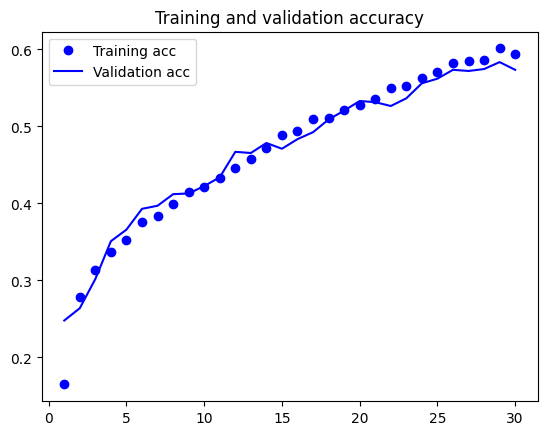

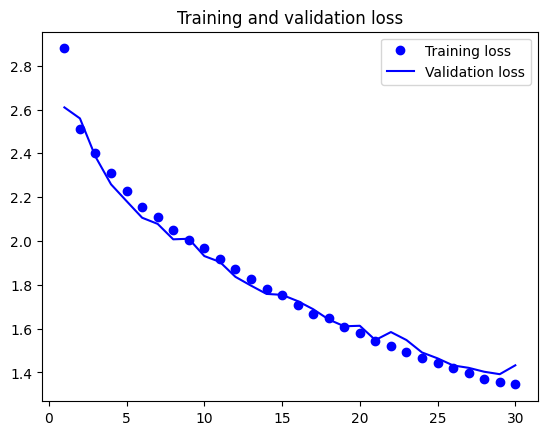

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

10/10 - 2s - 225ms/step - acc: 0.5580 - loss: 1.4608


## Model 1-7

- include dropout
- include L2 regularization
- added one cov2D layer with 256 units
- changed dense layer 1024 units -> 512 units

In [ ]:
from tensorflow.keras import regularizers

# Build the Model


model = models.Sequential()
model.add(keras.Input(shape=(img_size, img_size, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu')) #1024 to 512
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.summary()


# Compile the model

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 5, 5, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,328,586 (5.07 MB)

 Trainable params: 1,328,586 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Model

history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 46s 285ms/step - acc: 0.1403 - loss: 2.9223 - val_acc: 0.2690 - val_loss: 2.6099
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 43s 286ms/step - acc: 0.2808 - loss: 2.5440 - val_acc: 0.2845 - val_loss: 2.4723
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 43s 286ms/step - acc: 0.3125 - loss: 2.4345 - val_acc: 0.3385 - val_loss: 2.3565
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 279ms/step - acc: 0.3373 - loss: 2.3351 - val_acc: 0.3405 - val_loss: 2.2989
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 281ms/step - acc: 0.3532 - loss: 2.2551 - val_acc: 0.3485 - val_loss: 2.2909
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 41s 277ms/step - acc: 0.3829 - loss: 2.1457 - val_acc: 0.3845 - val_loss: 2.1681
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 43s 288ms/step - acc: 0.4009 - loss: 2.0924 - val_acc: 0.3860 - val_loss: 2.0843
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 41s 271ms/step - acc: 0.4129 - loss: 2.0542 - val_acc: 0.4000 - val_loss: 2.0135
Epoch 9/30
150/150 ━━━━━━━━━━━━━

In [ ]:
# Save the Model
model.save('/content/drive/My Drive/Colab Notebooks/DLIR/food_1_7_con2Dadd256_drop_L2_dense512.keras')

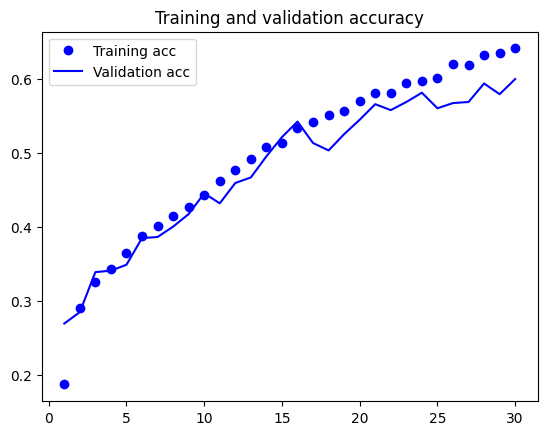

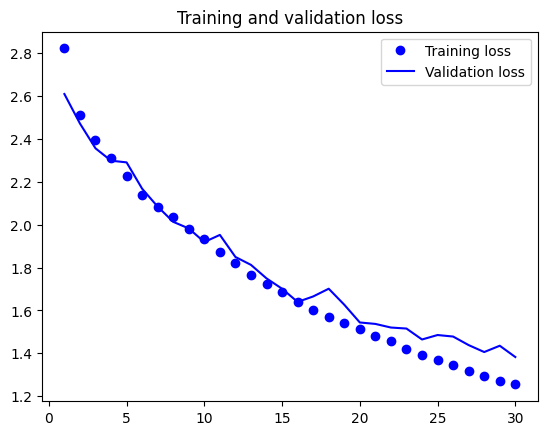

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

10/10 - 2s - 205ms/step - acc: 0.5940 - loss: 1.4119


### **End of this notebook, training and adjustments to continue in the next notebook**

We continue development in the second notebook where data augmentation was implemented for training.

From this notebook, model 1-5  and model 1-7 were the best performing models. Their settings were used for continued training with augmented image data in the next notebook.